<a href="https://colab.research.google.com/github/RITIK-12/tCrop/blob/main/Notebooks/Paddy_Thermal_Image_Classification_Resnet_50_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import pathlib
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
data_dir = '/content/drive/MyDrive/PlantStressDetection/ThermalPaddyImages/Dataset/'
data_dir = pathlib.Path(data_dir)
train_dir = '/content/drive/MyDrive/PlantStressDetection/ThermalPaddyImages/Dataset/train/'
train_dir = pathlib.Path(train_dir)
test_dir = '/content/drive/MyDrive/PlantStressDetection/ThermalPaddyImages/Dataset/test/'
test_dir = pathlib.Path(test_dir)
valid_dir = '/content/drive/MyDrive/PlantStressDetection/ThermalPaddyImages/Dataset/val/'
valid_dir = pathlib.Path(valid_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

0


In [ ]:
batch_size = 16
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
  )

Found 1539 files belonging to 5 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

Found 439 files belonging to 5 classes.


In [ ]:
test_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode = "categorical",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=1, shuffle = False)

Found 222 files belonging to 5 classes.


In [ ]:
class_names = test_ds.class_names
print(class_names)

['BLB', 'Blast', 'healthy', 'hispa', 'leaf_spot']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 224, 224, 3)
(16, 5)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE) 

In [ ]:
filepath = "/content/drive/MyDrive/PlantDiseaseThermal/PreTrainedmodels/Resnet50.h5"

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_save = tf.keras.callbacks.ModelCheckpoint(filepath, monitor="val_accuracy", verbose=0, save_best_only=True, save_weights_only=False, mode="max", save_freq="epoch")
 
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.2,
                                   patience=4,
                                   verbose=1,
                                   min_delta=1e-3,min_lr = 5*1e-12,
                                   )

callbacks = [model_save]

In [ ]:
model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='max')
x = Dense(5, activation='softmax')((model.output))

In [ ]:
model= Model(inputs=model.input, outputs=x)

In [ ]:
for layer in model.layers:
 set_trainable = True

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics='accuracy')

In [ ]:
history =  model.fit(train_ds, validation_data=val_ds, steps_per_epoch=np.ceil(float(1539)/float(batch_size)), epochs = 30, validation_steps=np.ceil(float(439)/float(batch_size)), use_multiprocessing= True,callbacks=callbacks)

Epoch 1/30
97/97 [==============================] - 24s 203ms/step - loss: 7.8044 - accuracy: 0.4620 - val_loss: 16.7226 - val_accuracy: 0.2961
Epoch 2/30
97/97 [==============================] - 18s 181ms/step - loss: 2.5787 - accuracy: 0.5854 - val_loss: 3943.6958 - val_accuracy: 0.1936
Epoch 3/30
97/97 [==============================] - 20s 211ms/step - loss: 1.9844 - accuracy: 0.6511 - val_loss: 20.4930 - val_accuracy: 0.5216
Epoch 4/30
97/97 [==============================] - 21s 213ms/step - loss: 0.7798 - accuracy: 0.8116 - val_loss: 0.6713 - val_accuracy: 0.7973
Epoch 5/30
97/97 [==============================] - 18s 180ms/step - loss: 0.3974 - accuracy: 0.8876 - val_loss: 0.6759 - val_accuracy: 0.7904
Epoch 6/30
97/97 [==============================] - 21s 213ms/step - loss: 0.2118 - accuracy: 0.9331 - val_loss: 0.5080 - val_accuracy: 0.8519
Epoch 7/30
97/97 [==============================] - 21s 213ms/step - loss: 0.1823 - accuracy: 0.9402 - val_loss: 0.5104 - val_accuracy: 0

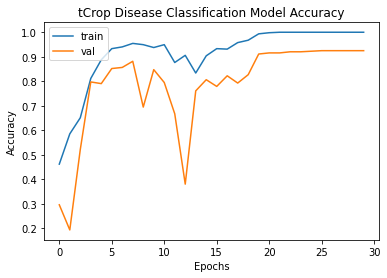

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('tCrop Disease Classification Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('/content/drive/MyDrive/PlantDiseaseThermal/figures/custom_1_acc.png', bbox_inches='tight')
plt.show()

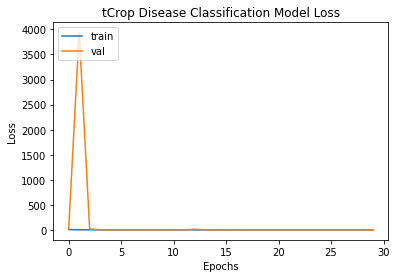

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('tCrop Disease Classification Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('/content/drive/MyDrive/PlantDiseaseThermal/figures/custom_1_loss.png', bbox_inches='tight')
plt.show()

In [ ]:
#Prediction Function
array = model.predict(test_ds, batch_size=1, verbose=1)
y_pred = np.argmax(array, axis=1)

222/222 [==============================] - 3s 10ms/step


In [ ]:
y_true = y = np.concatenate([y for x, y in test_ds], axis=0)

In [ ]:
rounded_labels=np.argmax(y_true, axis=1)
rounded_labels[1]

0

In [ ]:
conf_mat = confusion_matrix(rounded_labels, y_pred)

In [ ]:
conf_mat

array([[43,  0,  1,  0,  0],
       [ 1, 42,  0,  3,  2],
       [ 2,  1, 43,  0,  1],
       [ 1,  2,  0, 40,  0],
       [ 2,  0,  2,  0, 36]])

In [ ]:
classes = class_names

In [ ]:
from sklearn import metrics
report = metrics.classification_report(rounded_labels, y_pred, target_names=classes)
print(report) 

              precision    recall  f1-score   support

         BLB       0.88      0.98      0.92        44
       Blast       0.93      0.88      0.90        48
     healthy       0.93      0.91      0.92        47
       hispa       0.93      0.93      0.93        43
   leaf_spot       0.92      0.90      0.91        40

    accuracy                           0.92       222
   macro avg       0.92      0.92      0.92       222
weighted avg       0.92      0.92      0.92       222



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    #plt.savefig('/content/drive/MyDrive/PlantDiseaseThermal/figures/ConfusionMetrics/{}1.jpg'.format(title))
    plt.show()

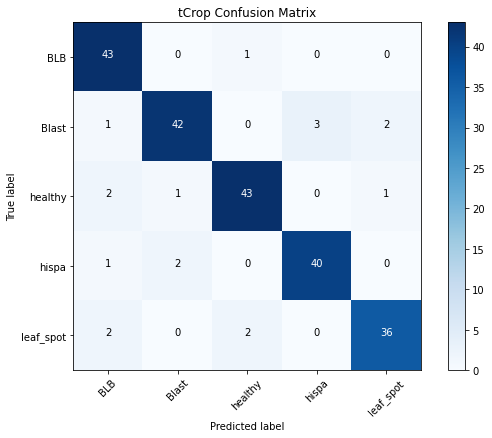

In [ ]:
plot_confusion_matrix(conf_mat,target_names=classes,title='tCrop Confusion Matrix',normalize=False)

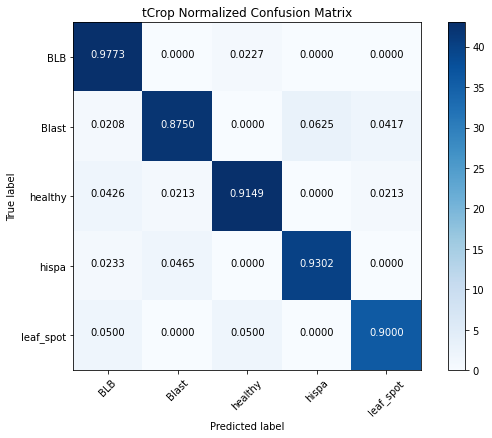

In [ ]:
plot_confusion_matrix(conf_mat,target_names=classes,title='tCrop Normalized Confusion Matrix',normalize=True)